<a href="https://colab.research.google.com/github/rakshahub/titanic-data-analysis/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(subset=['Embarked'], inplace=True)


In [7]:
print("Overall survival rate:", df['Survived'].mean() * 100)
print(df.groupby('Sex')['Survived'].mean() * 100)


Overall survival rate: 38.24521934758155
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64


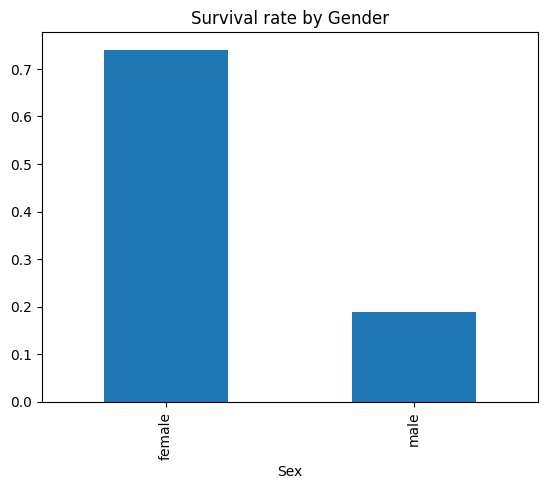

In [10]:
import matplotlib.pyplot as plt

# example plot
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival rate by Gender')
plt.savefig('survival_by_gender.png', bbox_inches='tight')


In [11]:
![Survival by Gender](survival_by_sex.png)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Survival by Gender](survival_by_sex.png)'


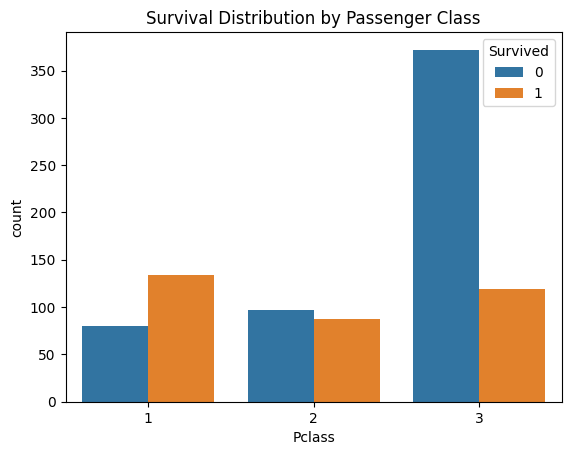

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Distribution by Passenger Class")
plt.show()


In [13]:
![Survival by Class](survival_by_class.png)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Survival by Class](survival_by_class.png)'


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features
features = ["Pclass", "Sex", "Age", "Fare"]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})   # convert to numeric
df = df.dropna(subset=features)

X = df[features]
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model creation
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))


✅ Model Accuracy: 0.7865168539325843


In [15]:
def predict_survival(pclass, sex, age, fare):
    sex = 1 if sex.lower() == "female" else 0

    input_data = pd.DataFrame({
        "Pclass": [pclass],
        "Sex": [sex],
        "Age": [age],
        "Fare": [fare]
    })

    prediction = model.predict(input_data)[0]

    if prediction == 1:
        return "✅ Passenger would SURVIVE"
    else:
        return "❌ Passenger would NOT survive"

# Example prediction
predict_survival(3, "female", 22, 7.25)


'✅ Passenger would SURVIVE'